In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_confusion_matrix

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/airline_passenger_satisfaction.csv")

In [3]:
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
data = data.drop(columns = [data.columns[0]])
data.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [6]:
data = data.dropna(axis = 0, how = 'any')
data.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [7]:
cat_columns = data.select_dtypes(include = ['object'])
le = LabelEncoder()
cat_encoded = cat_columns.apply(le.fit_transform)

In [8]:
cat_encoded

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,1,0,1,2,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,1,0,0,0,1
...,...,...,...,...,...
129875,1,1,0,0,0
129876,1,0,0,0,1
129877,0,0,1,1,0
129878,1,0,0,0,1


In [9]:
cat_labels = cat_encoded.columns
data = data.drop(columns = cat_labels, axis = 1)
data = pd.concat([data, cat_encoded], axis = 1)
data.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,1,0,0,0,1


<AxesSubplot:>

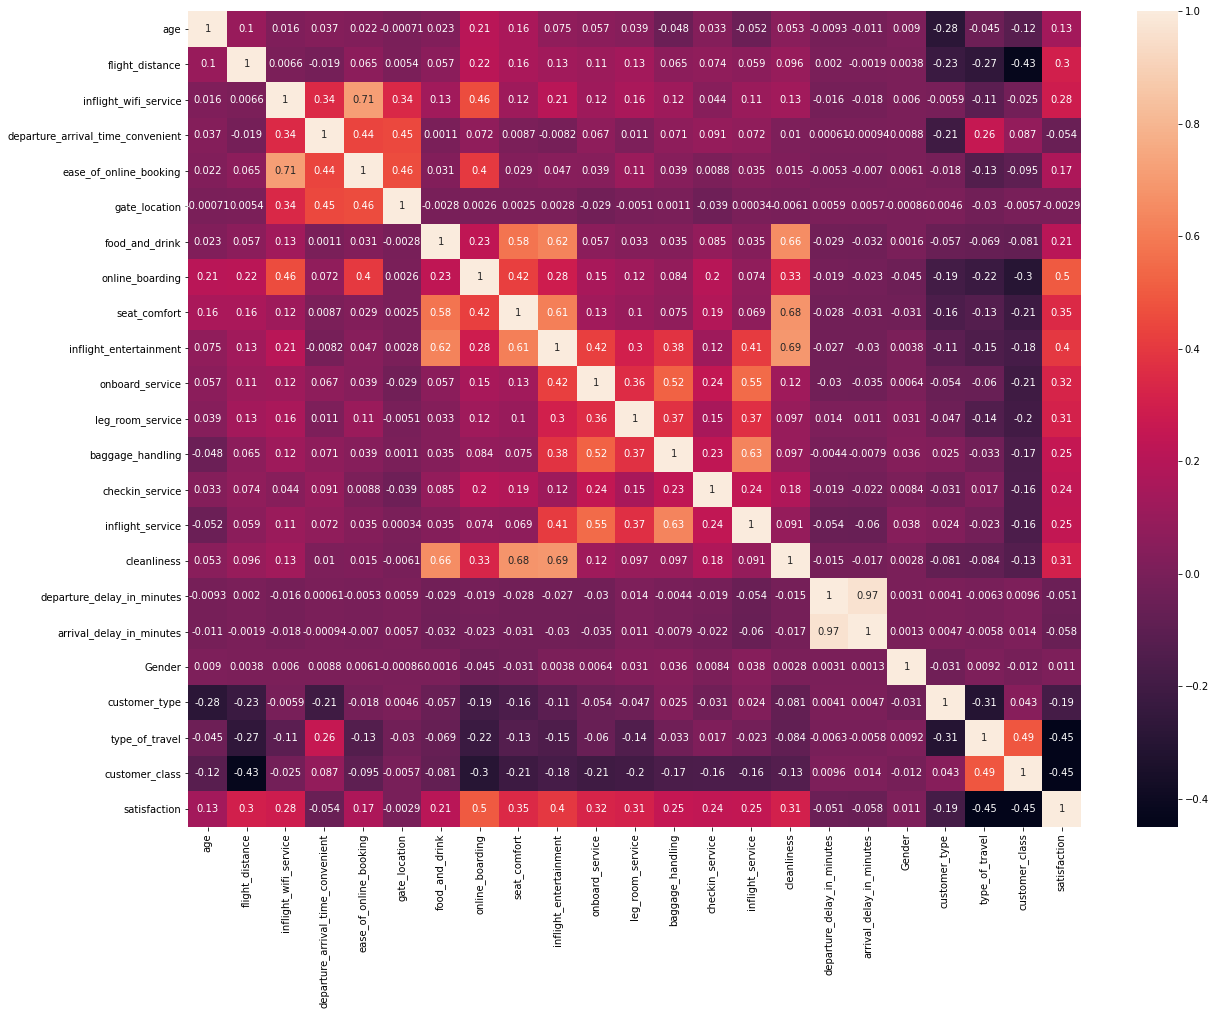

In [10]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot = True)

In [11]:
corr = data[data.columns[1:]].corr()['satisfaction'][:-1]
corr

flight_distance                      0.298206
inflight_wifi_service                0.283291
departure_arrival_time_convenient   -0.054457
ease_of_online_booking               0.168704
gate_location                       -0.002923
food_and_drink                       0.211164
online_boarding                      0.501620
seat_comfort                         0.348576
inflight_entertainment               0.398334
onboard_service                      0.322329
leg_room_service                     0.312557
baggage_handling                     0.248651
checkin_service                      0.237146
inflight_service                     0.245027
cleanliness                          0.306891
departure_delay_in_minutes          -0.051032
arrival_delay_in_minutes            -0.058275
Gender                               0.011496
customer_type                       -0.185925
type_of_travel                      -0.449794
customer_class                      -0.448338
Name: satisfaction, dtype: float64

In [12]:
names = []
for i, r in corr.items():
    if  ((r < 0.06) & (r > -0.06)):
        names.append(i)
names

['departure_arrival_time_convenient',
 'gate_location',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes',
 'Gender']

In [13]:
data = data.drop(columns = data[names])
data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type,type_of_travel,customer_class,satisfaction
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,0,1,2,0
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,1
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0,0,0,1


In [14]:
data.iloc[:, :-1]

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type,type_of_travel,customer_class
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,0,1,2
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,1,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,4,3,4,4,3,2,4,4,5,4,1,0,0
129876,23,646,4,4,4,4,4,4,4,5,5,5,5,4,0,0,0
129877,17,828,2,1,2,1,2,2,4,3,4,5,4,2,0,1,1
129878,14,1127,3,3,4,4,4,4,3,2,5,4,5,4,0,0,0


In [15]:
X = data.iloc[:, :-1]
y = data[['satisfaction']]
sc = StandardScaler()
x = sc.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(86756, 17)
(42731, 17)
(86756, 1)
(42731, 1)


In [16]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train.values.ravel())
log_proba = log_reg.predict_proba(x_test)
log_proba = log_proba[:,1]
log_pred = log_reg.predict(x_test)
log_reg.score(x_test, y_test)

0.8721303035267136

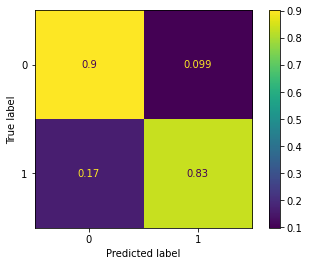

In [17]:
plot_confusion_matrix(log_reg, x_test, y_test, normalize = 'true')

In [18]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     24236
           1       0.87      0.83      0.85     18495

    accuracy                           0.87     42731
   macro avg       0.87      0.87      0.87     42731
weighted avg       0.87      0.87      0.87     42731



In [19]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_proba = dt.predict_proba(x_test)
dt_proba = dt_proba[:,1]
dt_pred = dt.predict(x_test)
dt.score(x_test,y_test)

0.9433666424843791

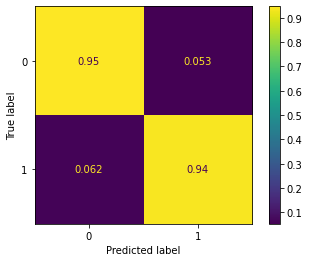

In [20]:
plot_confusion_matrix(dt, x_test, y_test, normalize = 'true')

In [21]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     24236
           1       0.93      0.94      0.93     18495

    accuracy                           0.94     42731
   macro avg       0.94      0.94      0.94     42731
weighted avg       0.94      0.94      0.94     42731



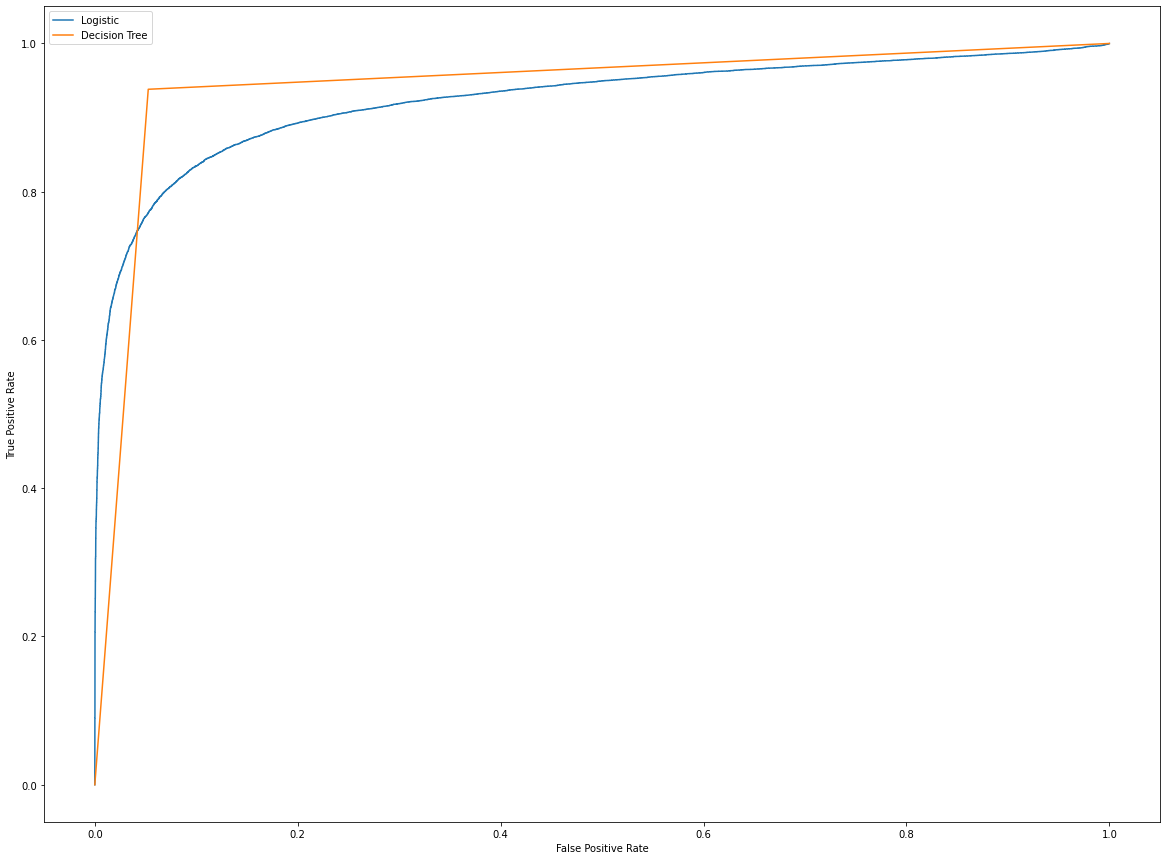

In [22]:
lr_auc = roc_auc_score(y_test, log_proba)
lr_fpr, lr_tpr, _ = roc_curve(y_test, log_proba)
dt_auc = roc_auc_score(y_test, dt_proba)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)
plt.figure(figsize=(20, 15))

plt.plot(lr_fpr, lr_tpr,  label='Logistic')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()